# INX Future Inc Employee Performance Analysis

## Project Overview

INX Future Inc is a leading data analytics and automation solutions provider with over 15 years of global business presence. Despite being consistently rated as a top 20 best employer, recent employee performance indexes have declined, leading to increased service delivery escalations and an 8 percentage point drop in client satisfaction.

**Project Objectives:**
1. Department wise performance analysis
2. Identify top 3 important factors affecting employee performance
3. Build a predictive model for employee performance
4. Provide actionable recommendations for performance improvement

**Business Context:**
- CEO Mr. Brain wants data-driven insights to make informed decisions
- Need to identify non-performing employees without affecting overall morale
- Maintain company's reputation as a best employer while improving performance

## 1. Data Loading and Initial Exploration

In [22]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
# Load the employee performance dataset
file_path = r'INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls'

try:
    # Try to load the file using the relative path first
    df = pd.read_excel(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    try:
        # If relative path fails, try the absolute path
        absolute_path = r"C:\Users\tonyn\Desktop\IABAC exams (Liz)\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls"
        df = pd.read_excel(absolute_path)
        print("Dataset loaded successfully using absolute path!")
    except FileNotFoundError:
        print("Error: Dataset file not found. Please check if the file exists in the current directory.")
        print("Expected file:", file_path)
        raise

print(f"Dataset shape: {df.shape}")
print(f"Number of employees: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Dataset loaded successfully!
Dataset shape: (1200, 28)
Number of employees: 1200
Number of features: 28


In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [4]:
# Dataset information
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 1

In [5]:
# Check column names
print("Column names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

Column names:
 1. EmpNumber
 2. Age
 3. Gender
 4. EducationBackground
 5. MaritalStatus
 6. EmpDepartment
 7. EmpJobRole
 8. BusinessTravelFrequency
 9. DistanceFromHome
10. EmpEducationLevel
11. EmpEnvironmentSatisfaction
12. EmpHourlyRate
13. EmpJobInvolvement
14. EmpJobLevel
15. EmpJobSatisfaction
16. NumCompaniesWorked
17. OverTime
18. EmpLastSalaryHikePercent
19. EmpRelationshipSatisfaction
20. TotalWorkExperienceInYears
21. TrainingTimesLastYear
22. EmpWorkLifeBalance
23. ExperienceYearsAtThisCompany
24. ExperienceYearsInCurrentRole
25. YearsSinceLastPromotion
26. YearsWithCurrManager
27. Attrition
28. PerformanceRating


In [6]:
# Basic statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


## 2. Data Cleaning and Preprocessing

In [7]:
# Check for missing values
print("Missing values per column:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df)

Missing values per column:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


In [8]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print("Removing duplicate rows...")
    df = df.drop_duplicates()
    print(f"Dataset shape after removing duplicates: {df.shape}")

Number of duplicate rows: 0


In [9]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")

Categorical columns (9): ['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']
Numerical columns (19): ['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating']

Numerical columns (19): ['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtT

In [10]:
# Check unique values in categorical columns
print("Unique values in categorical columns:")
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"\n{col} ({unique_count} unique values):")
    if unique_count <= 20:  # Show values if not too many
        print(df[col].value_counts())
    else:
        print(f"Too many unique values to display ({unique_count})")

Unique values in categorical columns:

EmpNumber (1200 unique values):
Too many unique values to display (1200)

Gender (2 unique values):
Gender
Male      725
Female    475
Name: count, dtype: int64

EducationBackground (6 unique values):
EducationBackground
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: count, dtype: int64

MaritalStatus (3 unique values):
MaritalStatus
Married     548
Single      384
Divorced    268
Name: count, dtype: int64

EmpDepartment (6 unique values):
EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64

EmpJobRole (19 unique values):
EmpJobRole
Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representativ

In [11]:
# Handle missing values (if any)
# For numerical columns: fill with median
# For categorical columns: fill with mode

df_cleaned = df.copy()

for col in numerical_cols:
    if df_cleaned[col].isnull().sum() > 0:
        median_val = df_cleaned[col].median()
        df_cleaned[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in {col} with median: {median_val}")

for col in categorical_cols:
    if df_cleaned[col].isnull().sum() > 0:
        mode_val = df_cleaned[col].mode()[0]
        df_cleaned[col].fillna(mode_val, inplace=True)
        print(f"Filled missing values in {col} with mode: {mode_val}")

print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum().sum())


Missing values after cleaning:
0

0


## 3. Exploratory Data Analysis

In [12]:
# Identify the target variable (Performance Rating)
# Look for performance-related columns
performance_cols = [col for col in df_cleaned.columns if 'performance' in col.lower() or 'rating' in col.lower()]
print(f"Potential performance columns: {performance_cols}")

# Display unique values in performance columns
for col in performance_cols:
    print(f"\n{col} - Unique values:")
    print(df_cleaned[col].value_counts().sort_index())

Potential performance columns: ['PerformanceRating']

PerformanceRating - Unique values:
PerformanceRating
2    194
3    874
4    132
Name: count, dtype: int64


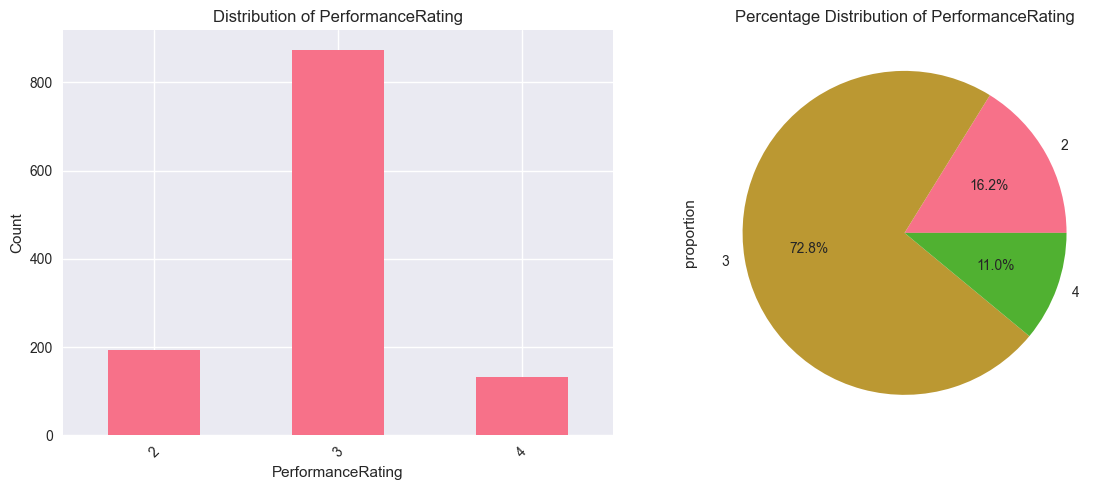


PerformanceRating Distribution:
PerformanceRating
2    194
3    874
4    132
Name: count, dtype: int64


In [13]:
# Visualize the distribution of the target variable
# Assuming the target is PerformanceRating or similar column
target_col = performance_cols[0] if performance_cols else 'PerformanceRating'

if target_col in df_cleaned.columns:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    df_cleaned[target_col].value_counts().sort_index().plot(kind='bar')
    plt.title(f'Distribution of {target_col}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    df_cleaned[target_col].value_counts(normalize=True).sort_index().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Percentage Distribution of {target_col}')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n{target_col} Distribution:")
    print(df_cleaned[target_col].value_counts().sort_index())
else:
    print("Target column not found. Please check column names.")

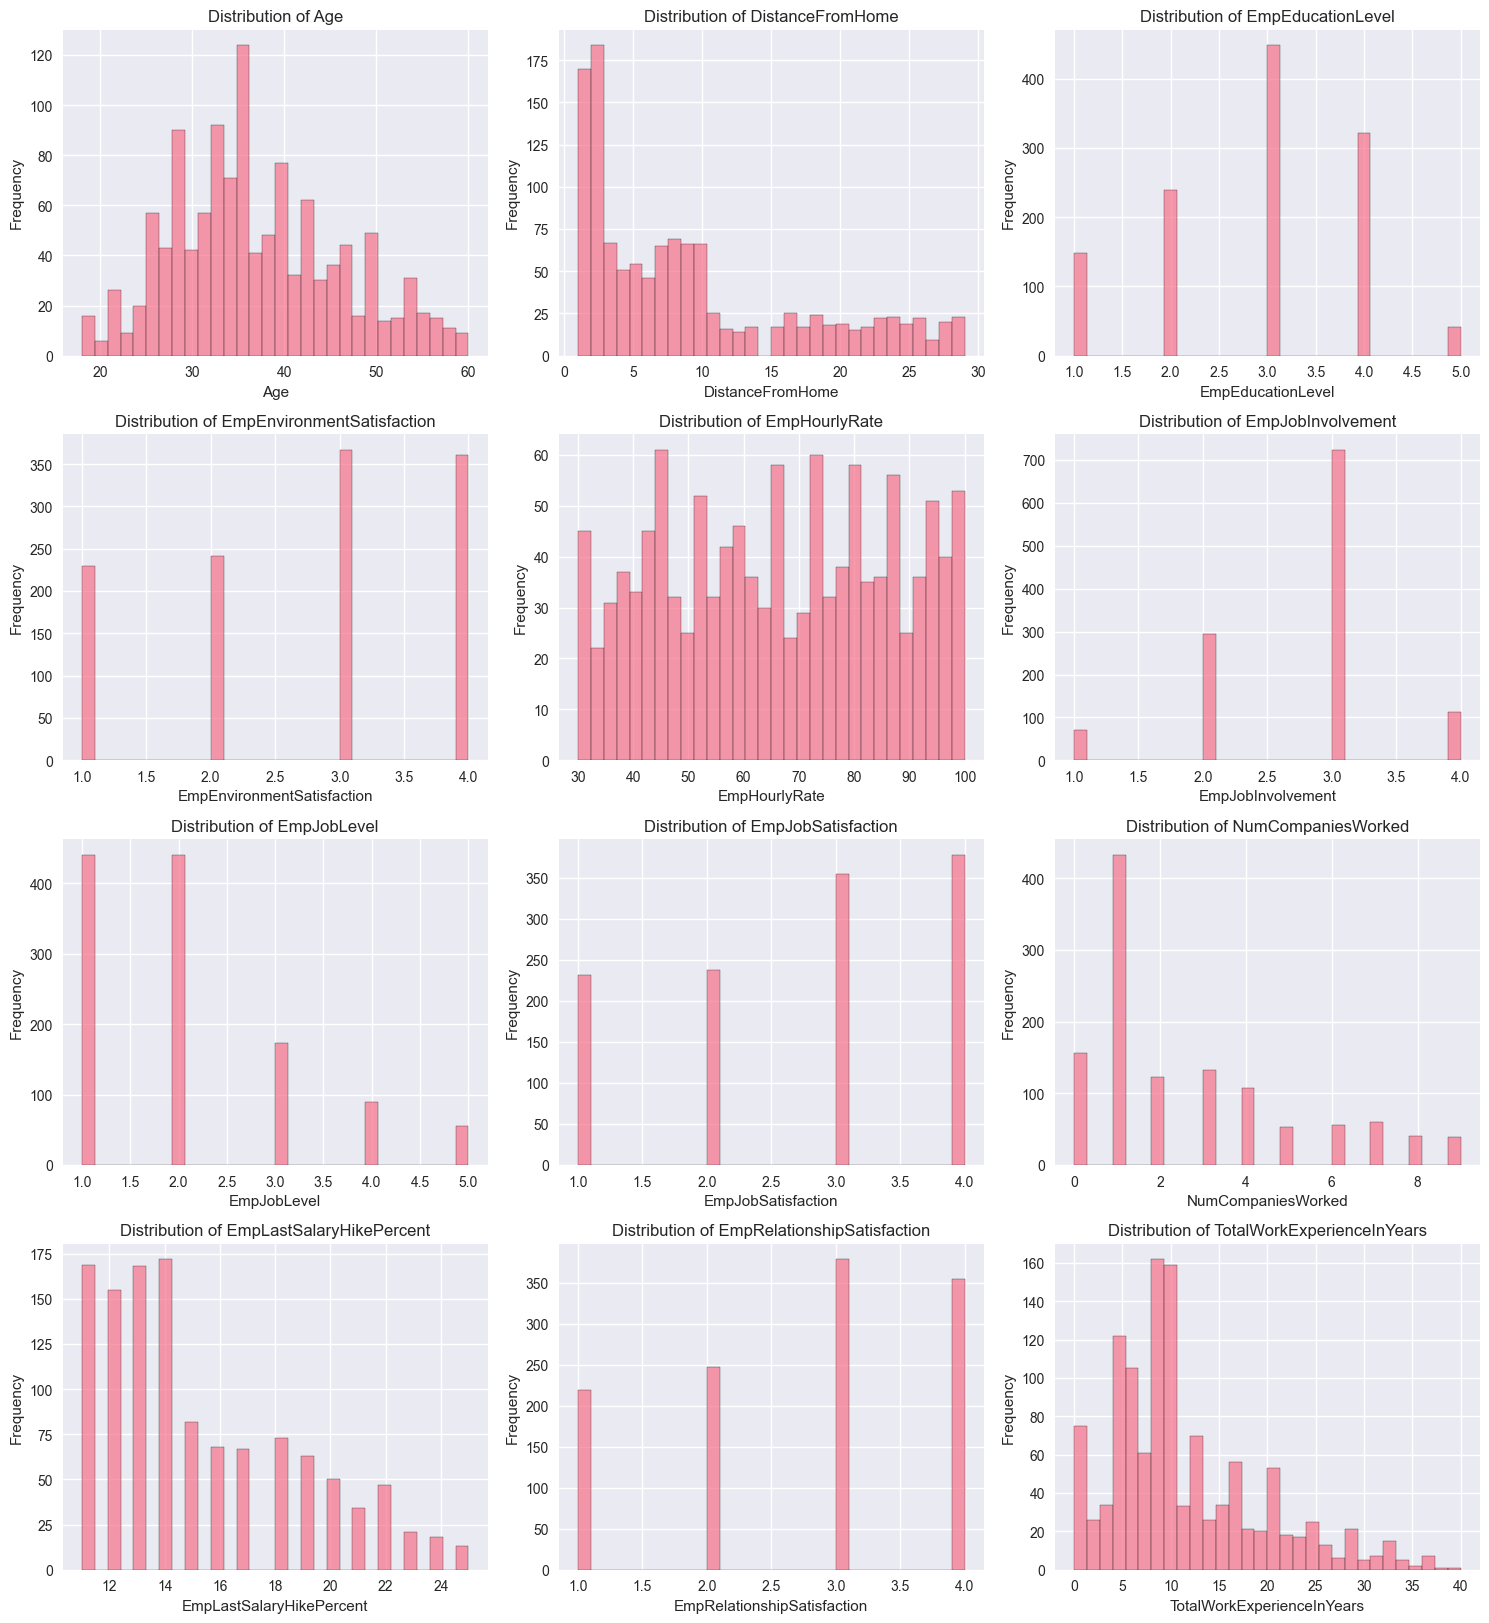

In [14]:
# Visualize distributions of numerical variables
num_cols_to_plot = [col for col in numerical_cols if col != target_col]

if len(num_cols_to_plot) > 0:
    n_cols = 3
    n_rows = (len(num_cols_to_plot) + n_cols - 1) // n_cols
    
    plt.figure(figsize=(15, 4 * n_rows))
    
    for i, col in enumerate(num_cols_to_plot[:12], 1):  # Limit to first 12 columns
        plt.subplot(n_rows, n_cols, i)
        df_cleaned[col].hist(bins=30, alpha=0.7, edgecolor='black')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

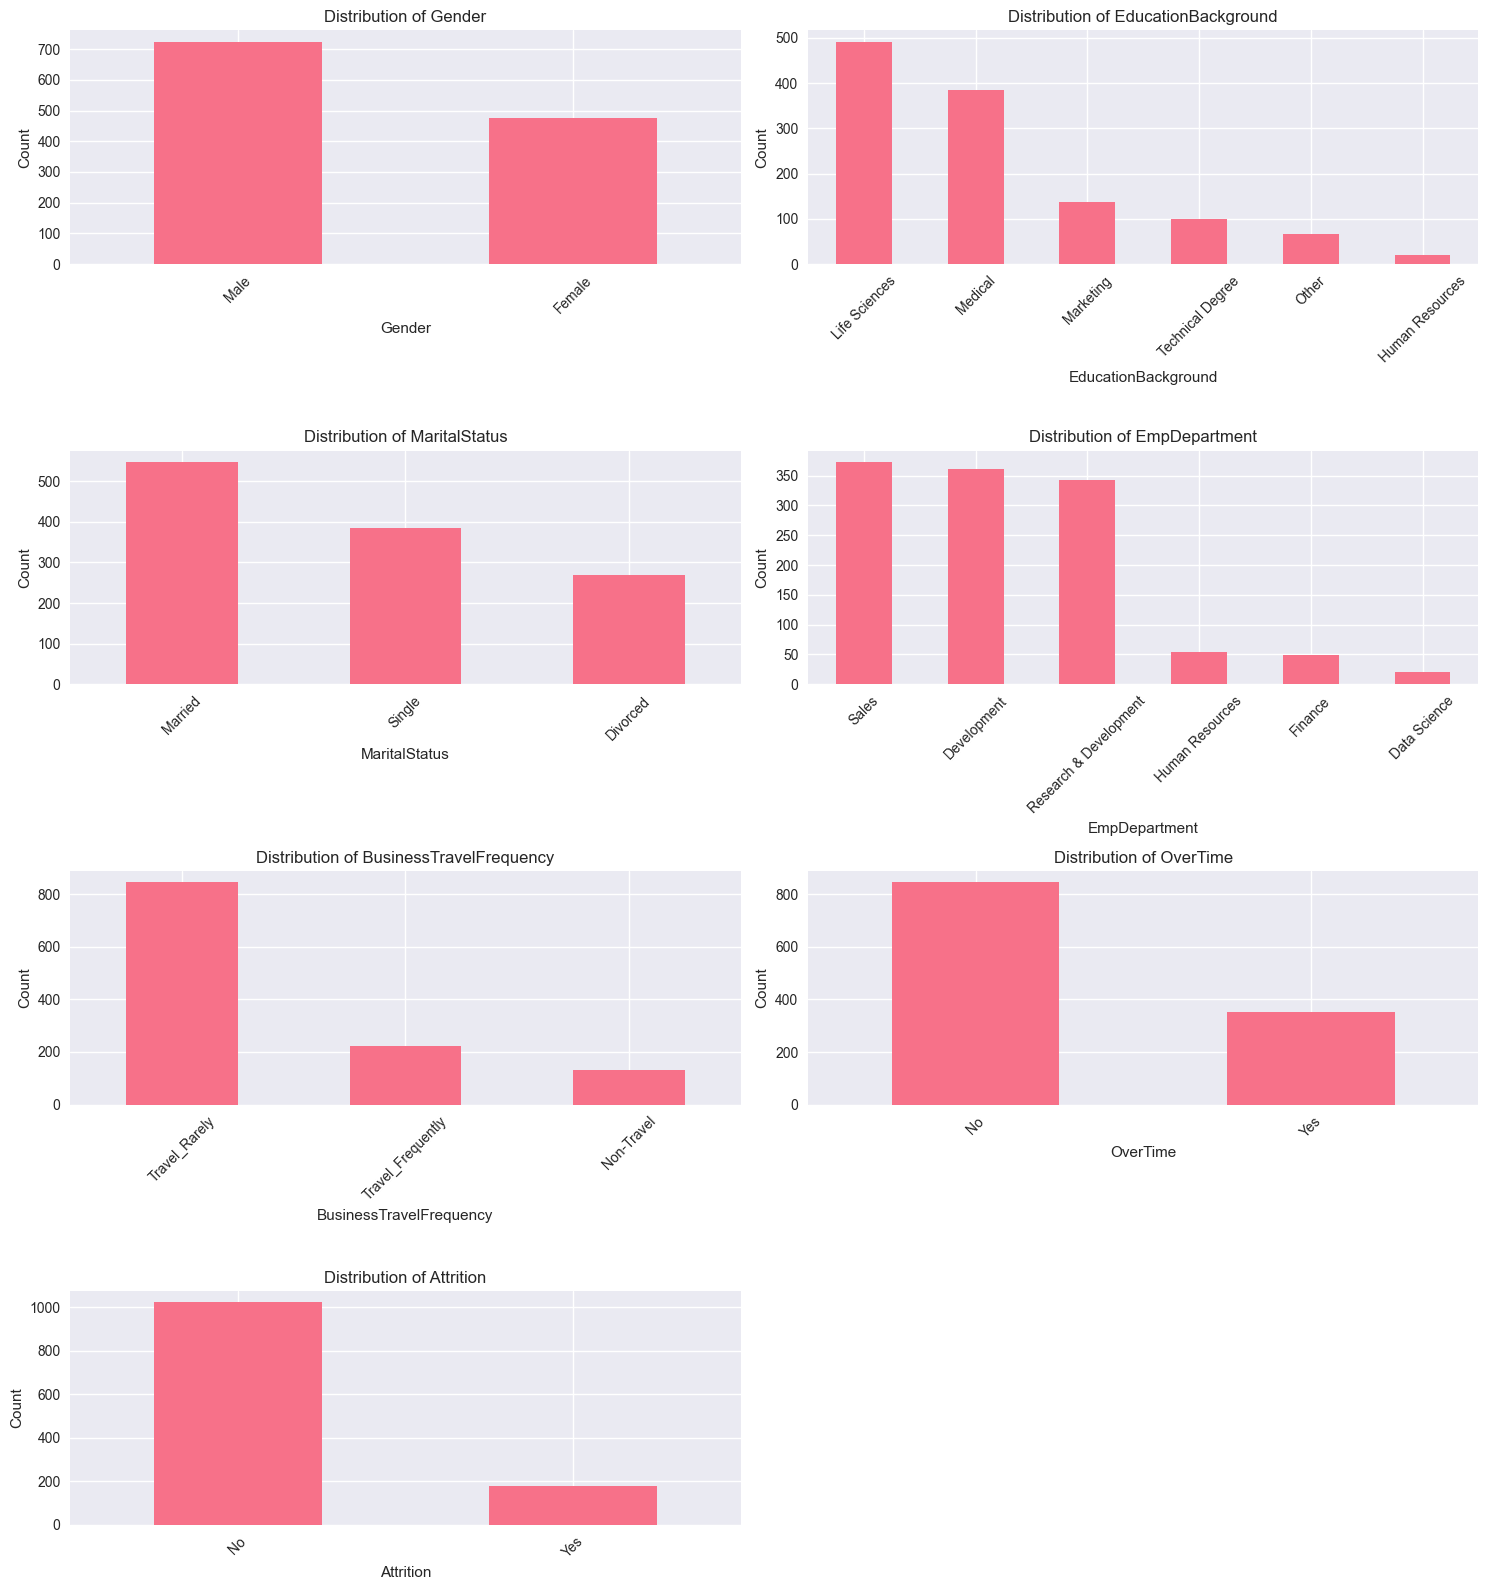

In [15]:
# Analyze categorical variables
categorical_to_plot = [col for col in categorical_cols if df_cleaned[col].nunique() <= 10]

if len(categorical_to_plot) > 0:
    n_cols = 2
    n_rows = (len(categorical_to_plot) + n_cols - 1) // n_cols
    
    plt.figure(figsize=(15, 4 * n_rows))
    
    for i, col in enumerate(categorical_to_plot, 1):
        plt.subplot(n_rows, n_cols, i)
        df_cleaned[col].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

## 4. Department-wise Performance Analysis

In [16]:
# Find department column
dept_cols = [col for col in df_cleaned.columns if 'department' in col.lower() or 'dept' in col.lower()]
print(f"Department columns found: {dept_cols}")

if dept_cols:
    dept_col = dept_cols[0]
    print(f"\nUsing {dept_col} for department analysis")
    print(f"Departments: {df_cleaned[dept_col].unique()}")
else:
    # If no direct department column, look for similar columns
    possible_dept_cols = [col for col in categorical_cols if df_cleaned[col].nunique() < 20]
    print(f"Possible department columns: {possible_dept_cols}")
    if possible_dept_cols:
        dept_col = possible_dept_cols[0]  # Take the first one
        print(f"Using {dept_col} as department column")

Department columns found: ['EmpDepartment']

Using EmpDepartment for department analysis
Departments: ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']


Department-wise Performance Summary:
                        Average_Performance  Employee_Count  \
EmpDepartment                                                 
Development                            3.09             361   
Data Science                           3.05              20   
Human Resources                        2.93              54   
Research & Development                 2.92             343   
Sales                                  2.86             373   
Finance                                2.78              49   

                        Performance_StdDev  
EmpDepartment                               
Development                           0.39  
Data Science                          0.39  
Human Resources                       0.54  
Research & Development                0.56  
Sales                                 0.56  
Finance                               0.59  


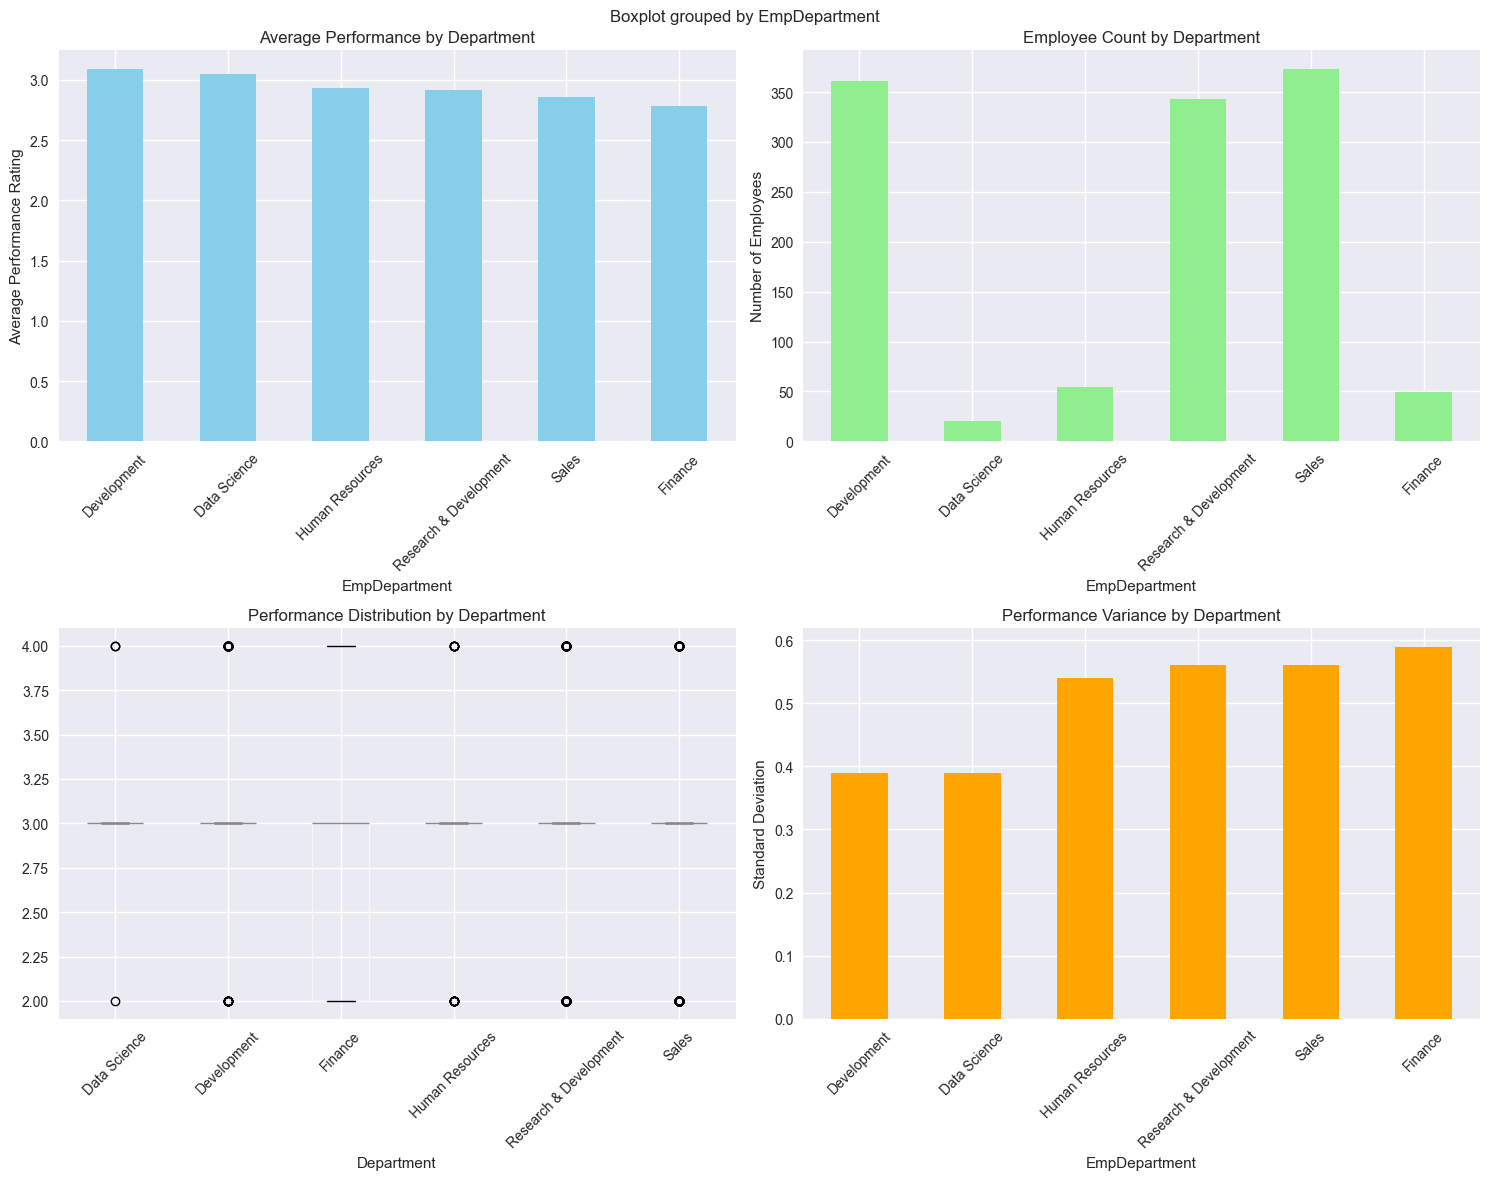

In [17]:
# Department-wise performance analysis
if 'dept_col' in locals() and target_col in df_cleaned.columns:
    # Performance by department
    dept_performance = df_cleaned.groupby(dept_col)[target_col].agg(['mean', 'count', 'std']).round(2)
    dept_performance.columns = ['Average_Performance', 'Employee_Count', 'Performance_StdDev']
    dept_performance = dept_performance.sort_values('Average_Performance', ascending=False)
    
    print("Department-wise Performance Summary:")
    print(dept_performance)
    
    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Average performance by department
    dept_performance['Average_Performance'].plot(kind='bar', ax=axes[0,0], color='skyblue')
    axes[0,0].set_title('Average Performance by Department')
    axes[0,0].set_ylabel('Average Performance Rating')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # 2. Employee count by department
    dept_performance['Employee_Count'].plot(kind='bar', ax=axes[0,1], color='lightgreen')
    axes[0,1].set_title('Employee Count by Department')
    axes[0,1].set_ylabel('Number of Employees')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # 3. Performance distribution by department (box plot)
    df_cleaned.boxplot(column=target_col, by=dept_col, ax=axes[1,0])
    axes[1,0].set_title('Performance Distribution by Department')
    axes[1,0].set_xlabel('Department')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # 4. Performance variance by department
    dept_performance['Performance_StdDev'].plot(kind='bar', ax=axes[1,1], color='orange')
    axes[1,1].set_title('Performance Variance by Department')
    axes[1,1].set_ylabel('Standard Deviation')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

Performance Rating Distribution by Department (%)
PerformanceRating          2     3     4
EmpDepartment                           
Data Science             5.0  85.0  10.0
Development              3.6  84.2  12.2
Finance                 30.6  61.2   8.2
Human Resources         18.5  70.4  11.1
Research & Development  19.8  68.2  12.0
Sales                   23.3  67.3   9.4


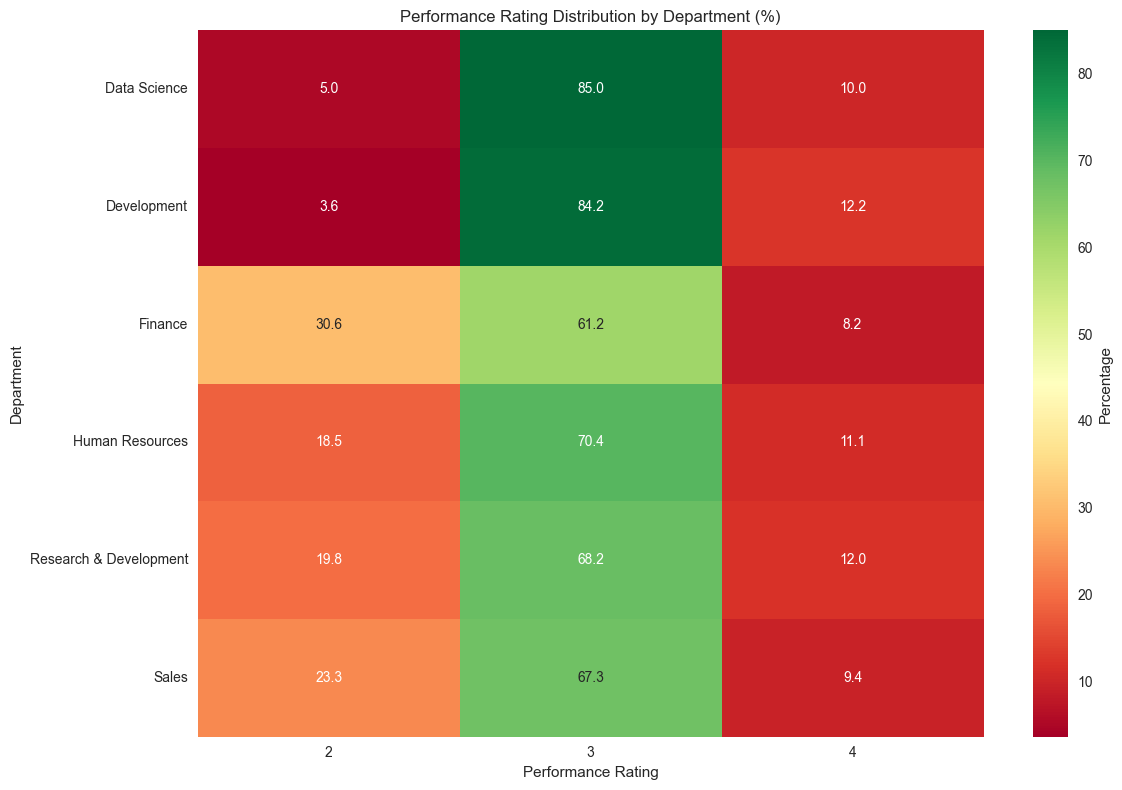

In [18]:
# Performance rating distribution by department
if 'dept_col' in locals() and target_col in df_cleaned.columns:
    # Cross-tabulation
    dept_perf_crosstab = pd.crosstab(df_cleaned[dept_col], df_cleaned[target_col], normalize='index') * 100
    
    print("Performance Rating Distribution by Department (%)")
    print(dept_perf_crosstab.round(1))
    
    # Heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(dept_perf_crosstab, annot=True, fmt='.1f', cmap='RdYlGn', 
                cbar_kws={'label': 'Percentage'})
    plt.title('Performance Rating Distribution by Department (%)')
    plt.ylabel('Department')
    plt.xlabel('Performance Rating')
    plt.tight_layout()
    plt.show()

In [19]:
# Identify underperforming departments
if 'dept_col' in locals() and target_col in df_cleaned.columns:
    overall_avg = df_cleaned[target_col].mean()
    print(f"Overall average performance: {overall_avg:.2f}")
    
    underperforming_depts = dept_performance[dept_performance['Average_Performance'] < overall_avg]
    
    print("\nUNDERPERFORMING DEPARTMENTS:")
    if len(underperforming_depts) > 0:
        for dept in underperforming_depts.index:
            avg_perf = underperforming_depts.loc[dept, 'Average_Performance']
            emp_count = underperforming_depts.loc[dept, 'Employee_Count']
            gap = overall_avg - avg_perf
            print(f"- {dept}: {avg_perf:.2f} (Gap: -{gap:.2f}, Employees: {emp_count})")
    else:
        print("No departments performing below average!")
    
    print("\nTOP PERFORMING DEPARTMENTS:")
    top_performing = dept_performance.head(3)
    for dept in top_performing.index:
        avg_perf = top_performing.loc[dept, 'Average_Performance']
        emp_count = top_performing.loc[dept, 'Employee_Count']
        print(f"- {dept}: {avg_perf:.2f} (Employees: {emp_count})")

Overall average performance: 2.95

UNDERPERFORMING DEPARTMENTS:
- Human Resources: 2.93 (Gap: -0.02, Employees: 54)
- Research & Development: 2.92 (Gap: -0.03, Employees: 343)
- Sales: 2.86 (Gap: -0.09, Employees: 373)
- Finance: 2.78 (Gap: -0.17, Employees: 49)

TOP PERFORMING DEPARTMENTS:
- Development: 3.09 (Employees: 361)
- Data Science: 3.05 (Employees: 20)
- Human Resources: 2.93 (Employees: 54)


## 5. Feature Importance Analysis

In [20]:
# Prepare data for feature importance analysis
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import scipy.stats as stats

# Create a copy for feature analysis
df_analysis = df_cleaned.copy()

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    if col in df_analysis.columns:
        le = LabelEncoder()
        df_analysis[col] = le.fit_transform(df_analysis[col].astype(str))
        label_encoders[col] = le

print("Categorical variables encoded successfully!")
print(f"Shape after encoding: {df_analysis.shape}")

Categorical variables encoded successfully!
Shape after encoding: (1200, 28)


In [23]:
# Feature importance using Random Forest
if target_col in df_analysis.columns:
    # Prepare features (X) and target (y)
    feature_cols = [col for col in df_analysis.columns if col != target_col]
    X = df_analysis[feature_cols]
    y = df_analysis[target_col]
    
    print(f"Features: {len(feature_cols)}")
    print(f"Target variable: {target_col}")
    
    # Determine if regression or classification
    if df_analysis[target_col].nunique() <= 5:
        # Classification
        rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
        model_type = "Classification"
    else:
        # Regression
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
        model_type = "Regression"
    
    # Fit the model
    rf_model.fit(X, y)
    
    # Get feature importances
    feature_importance = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print(f"\n{model_type} model fitted successfully!")
    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))

Features: 27
Target variable: PerformanceRating

Classification model fitted successfully!

Top 10 Most Important Features:
                         Feature  Importance
10    EmpEnvironmentSatisfaction    0.215963
17      EmpLastSalaryHikePercent    0.210612
24       YearsSinceLastPromotion    0.091408
0                      EmpNumber    0.055499
5                  EmpDepartment    0.037315
23  ExperienceYearsInCurrentRole    0.034389
11                 EmpHourlyRate    0.033654
6                     EmpJobRole    0.033612
22  ExperienceYearsAtThisCompany    0.030361
1                            Age    0.028494


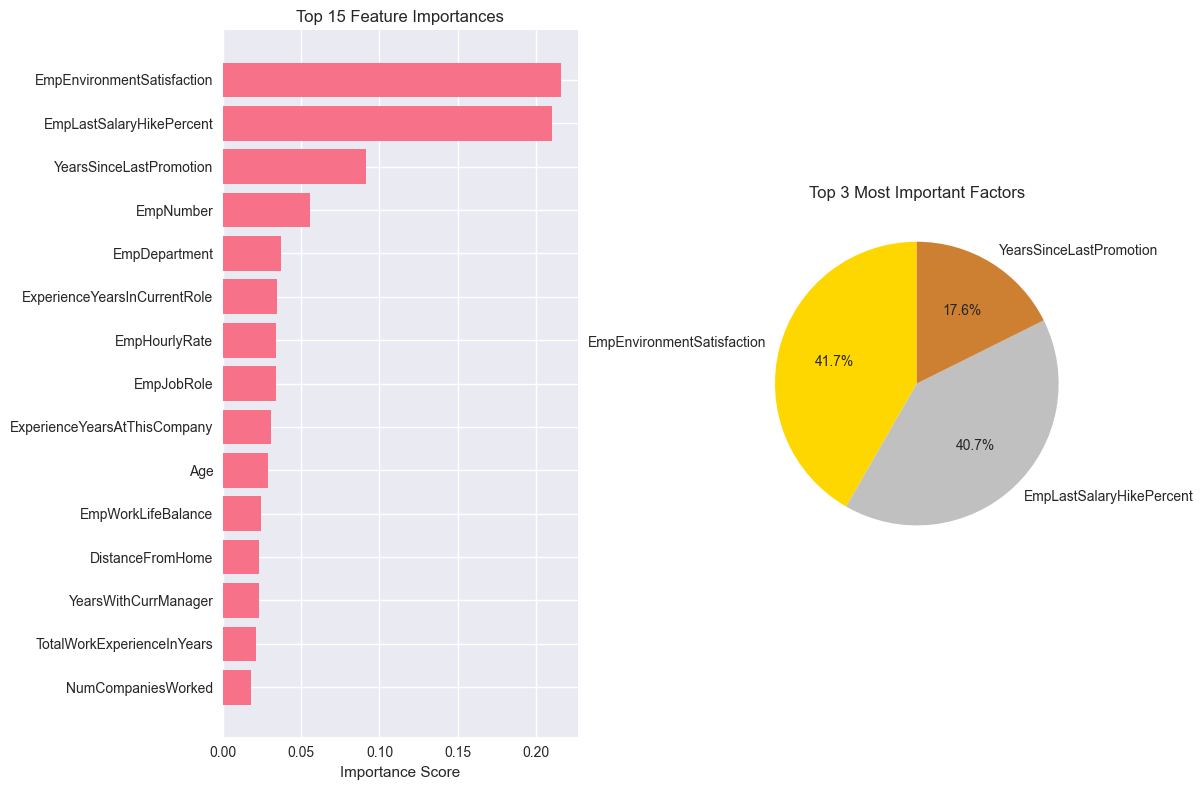


TOP 3 MOST IMPORTANT FACTORS AFFECTING EMPLOYEE PERFORMANCE:
1. EmpEnvironmentSatisfaction: 0.2160 (21.60%)
2. EmpLastSalaryHikePercent: 0.2106 (21.06%)
3. YearsSinceLastPromotion: 0.0914 (9.14%)


In [24]:
# Visualize top features
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)

plt.subplot(1, 2, 1)
plt.barh(range(len(top_features)), top_features['Importance'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance Score')
plt.title('Top 15 Feature Importances')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
top_3_features = feature_importance.head(3)
colors = ['gold', 'silver', '#CD7F32']  # Gold, Silver, Bronze
plt.pie(top_3_features['Importance'], labels=top_3_features['Feature'], 
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Top 3 Most Important Factors')

plt.tight_layout()
plt.show()

print("\nTOP 3 MOST IMPORTANT FACTORS AFFECTING EMPLOYEE PERFORMANCE:")
for i, (idx, row) in enumerate(top_3_features.iterrows(), 1):
    print(f"{i}. {row['Feature']}: {row['Importance']:.4f} ({row['Importance']*100:.2f}%)")

## 6. Correlation Analysis

Correlations with Performance Rating:
PerformanceRating               1.000000
EmpEnvironmentSatisfaction      0.395561
EmpLastSalaryHikePercent        0.333722
YearsSinceLastPromotion         0.167629
EmpDepartment                   0.162615
ExperienceYearsInCurrentRole    0.147638
EmpWorkLifeBalance              0.124429
YearsWithCurrManager            0.122313
ExperienceYearsAtThisCompany    0.111645
EmpJobRole                      0.096209
EmpJobLevel                     0.076632
TotalWorkExperienceInYears      0.068141
OverTime                        0.050206
DistanceFromHome                0.046142
EmpHourlyRate                   0.043116
Name: PerformanceRating, dtype: float64


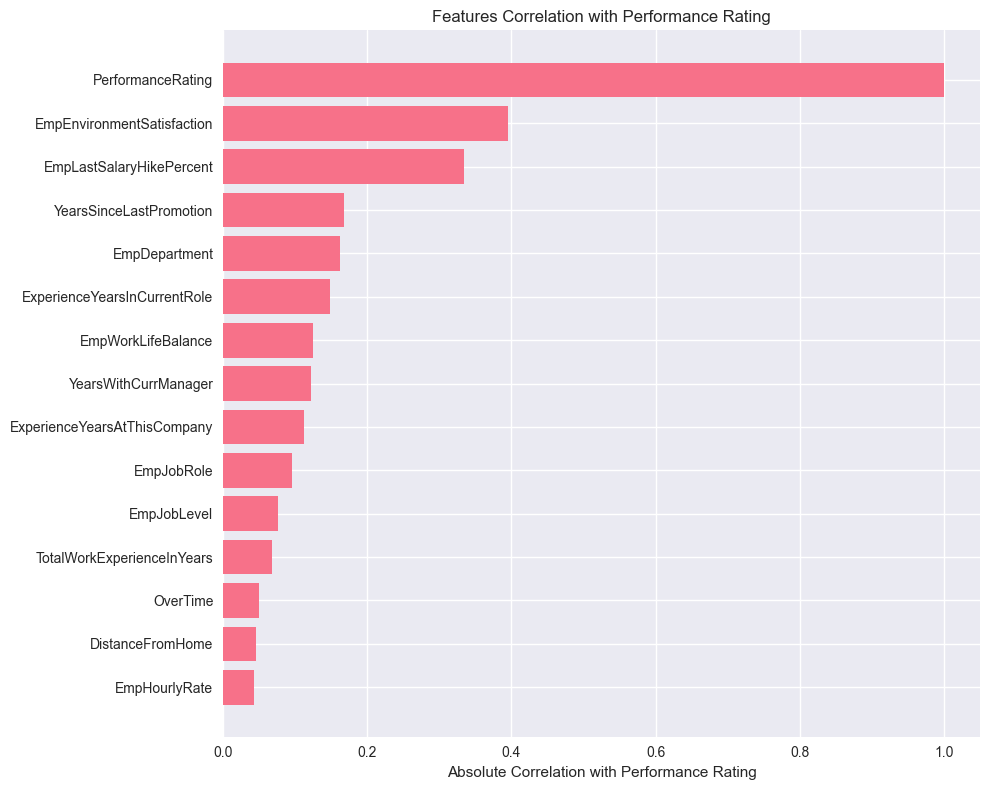

In [25]:
# Correlation analysis with target variable
if target_col in df_analysis.columns:
    # Calculate correlations with target variable
    correlations = df_analysis.corr()[target_col].abs().sort_values(ascending=False)
    
    print("Correlations with Performance Rating:")
    print(correlations.head(15))
    
    # Visualize correlations
    plt.figure(figsize=(10, 8))
    top_corr = correlations.head(15)
    plt.barh(range(len(top_corr)), top_corr.values)
    plt.yticks(range(len(top_corr)), top_corr.index)
    plt.xlabel('Absolute Correlation with Performance Rating')
    plt.title('Features Correlation with Performance Rating')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

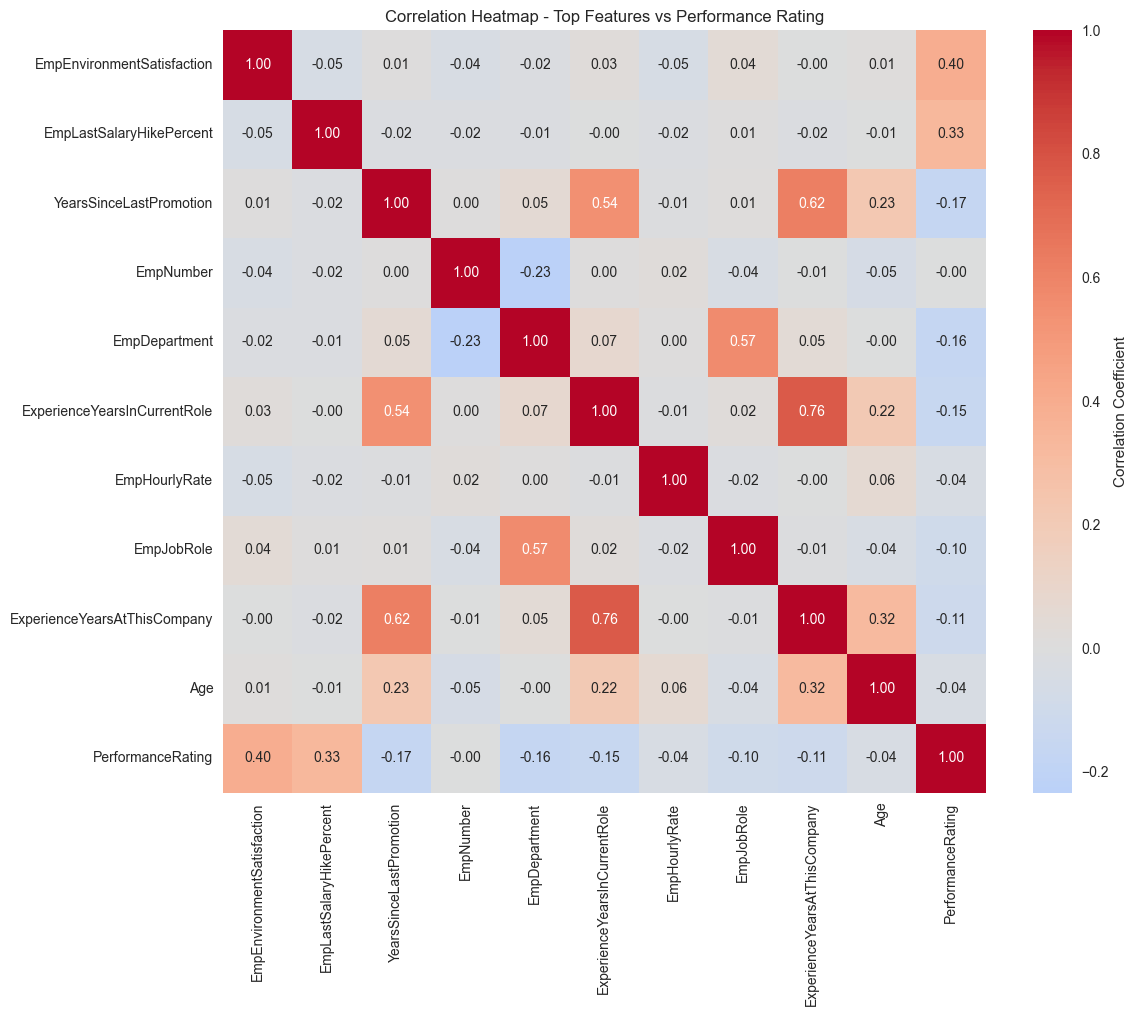

In [26]:
# Correlation heatmap for top features
top_features_list = feature_importance.head(10)['Feature'].tolist() + [target_col]
correlation_matrix = df_analysis[top_features_list].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap - Top Features vs Performance Rating')
plt.tight_layout()
plt.show()

## 7. Employee Performance Prediction Model

In [27]:
# Prepare data for modeling
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Training set distribution:\n{y_train.value_counts().sort_index()}")
print(f"Test set distribution:\n{y_test.value_counts().sort_index()}")

Training set size: 960
Test set size: 240
Training set distribution:
PerformanceRating
2    155
3    699
4    106
Name: count, dtype: int64
Test set distribution:
PerformanceRating
2     39
3    175
4     26
Name: count, dtype: int64


In [28]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")

Features scaled successfully!


In [29]:
# Train multiple models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

model_results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Use scaled data for Logistic Regression, original for tree-based models
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        # Cross-validation
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    model_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'predictions': y_pred
    }
    
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"CV Score: {cv_mean:.4f} (+/- {cv_std * 2:.4f})")


Training Random Forest...
Test Accuracy: 0.9375
CV Score: 0.9344 (+/- 0.0358)

Training Logistic Regression...
Test Accuracy: 0.8208
CV Score: 0.8125 (+/- 0.0238)

Training Gradient Boosting...
Test Accuracy: 0.9375
CV Score: 0.9344 (+/- 0.0358)

Training Logistic Regression...
Test Accuracy: 0.8208
CV Score: 0.8125 (+/- 0.0238)

Training Gradient Boosting...
Test Accuracy: 0.9292
CV Score: 0.9385 (+/- 0.0259)
Test Accuracy: 0.9292
CV Score: 0.9385 (+/- 0.0259)


Model Performance Comparison:
                 Model  Test_Accuracy   CV_Mean    CV_Std
0        Random Forest       0.937500  0.934375  0.017922
2    Gradient Boosting       0.929167  0.938542  0.012927
1  Logistic Regression       0.820833  0.812500  0.011877


Model Performance Comparison:
                 Model  Test_Accuracy   CV_Mean    CV_Std
0        Random Forest       0.937500  0.934375  0.017922
2    Gradient Boosting       0.929167  0.938542  0.012927
1  Logistic Regression       0.820833  0.812500  0.011877


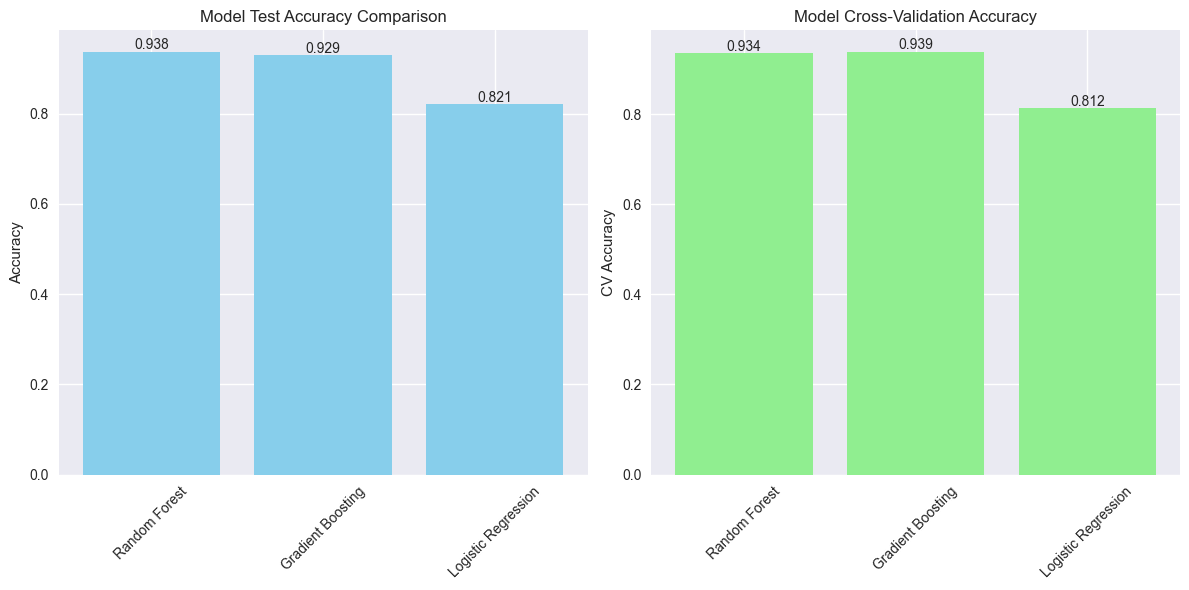


Best performing model: Random Forest
Test Accuracy: 0.9375


In [30]:
# Compare model performance
results_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'Test_Accuracy': [results['accuracy'] for results in model_results.values()],
    'CV_Mean': [results['cv_mean'] for results in model_results.values()],
    'CV_Std': [results['cv_std'] for results in model_results.values()]
})

results_df = results_df.sort_values('Test_Accuracy', ascending=False)
print("Model Performance Comparison:")
print(results_df)

# Visualize model comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(results_df['Model'], results_df['Test_Accuracy'], color='skyblue')
plt.title('Model Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
for i, v in enumerate(results_df['Test_Accuracy']):
    plt.text(i, v + 0.005, f'{v:.3f}', ha='center')

plt.subplot(1, 2, 2)
plt.bar(results_df['Model'], results_df['CV_Mean'], color='lightgreen')
plt.title('Model Cross-Validation Accuracy')
plt.ylabel('CV Accuracy')
plt.xticks(rotation=45)
for i, v in enumerate(results_df['CV_Mean']):
    plt.text(i, v + 0.005, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()

# Select best model
best_model_name = results_df.iloc[0]['Model']
best_model = model_results[best_model_name]['model']
print(f"\nBest performing model: {best_model_name}")
print(f"Test Accuracy: {model_results[best_model_name]['accuracy']:.4f}")

## 8. Model Evaluation and Validation

Classification Report for Random Forest:
              precision    recall  f1-score   support

           2       0.97      0.85      0.90        39
           3       0.93      0.99      0.96       175
           4       0.95      0.73      0.83        26

    accuracy                           0.94       240
   macro avg       0.95      0.86      0.90       240
weighted avg       0.94      0.94      0.94       240



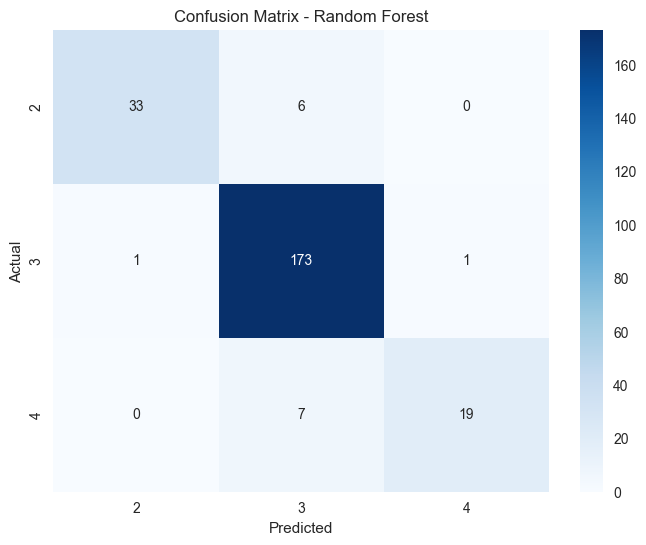

In [31]:
# Detailed evaluation of the best model
best_predictions = model_results[best_model_name]['predictions']

# Classification report
print(f"Classification Report for {best_model_name}:")
print(classification_report(y_test, best_predictions))

# Confusion matrix
cm = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Final Feature Importance from Random Forest:
                         Feature  Importance
10    EmpEnvironmentSatisfaction    0.207331
17      EmpLastSalaryHikePercent    0.199330
24       YearsSinceLastPromotion    0.091923
0                      EmpNumber    0.053187
6                     EmpJobRole    0.036877
23  ExperienceYearsInCurrentRole    0.035891
11                 EmpHourlyRate    0.034035
5                  EmpDepartment    0.033262
1                            Age    0.031730
22  ExperienceYearsAtThisCompany    0.030695



Final Feature Importance from Random Forest:
                         Feature  Importance
10    EmpEnvironmentSatisfaction    0.207331
17      EmpLastSalaryHikePercent    0.199330
24       YearsSinceLastPromotion    0.091923
0                      EmpNumber    0.053187
6                     EmpJobRole    0.036877
23  ExperienceYearsInCurrentRole    0.035891
11                 EmpHourlyRate    0.034035
5                  EmpDepartment    0.033262
1                            Age    0.031730
22  ExperienceYearsAtThisCompany    0.030695


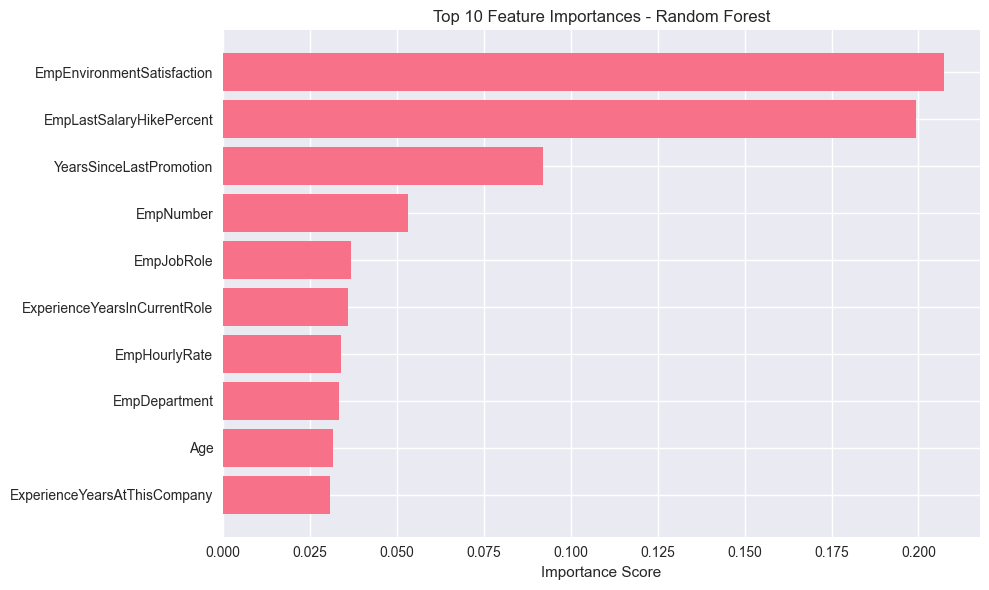

In [32]:
# Feature importance from the best model (if it's a tree-based model)
if hasattr(best_model, 'feature_importances_'):
    final_feature_importance = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print(f"\nFinal Feature Importance from {best_model_name}:")
    print(final_feature_importance.head(10))
    
    # Visualize
    plt.figure(figsize=(10, 6))
    top_10 = final_feature_importance.head(10)
    plt.barh(range(len(top_10)), top_10['Importance'])
    plt.yticks(range(len(top_10)), top_10['Feature'])
    plt.xlabel('Importance Score')
    plt.title(f'Top 10 Feature Importances - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

In [33]:
# Predict probabilities for risk assessment
if hasattr(best_model, 'predict_proba'):
    if best_model_name == 'Logistic Regression':
        probabilities = best_model.predict_proba(X_test_scaled)
    else:
        probabilities = best_model.predict_proba(X_test)
    
    # Create a dataframe with predictions and probabilities
    prob_df = pd.DataFrame(probabilities, columns=[f'Prob_Class_{i}' for i in range(probabilities.shape[1])])
    prob_df['Actual'] = y_test.values
    prob_df['Predicted'] = best_predictions
    prob_df['Correct'] = prob_df['Actual'] == prob_df['Predicted']
    
    print("Sample predictions with probabilities:")
    print(prob_df.head(10))
    
    # Identify high-risk employees (low performance probability)
    if len(prob_df.columns) > 1:
        # Assuming lower performance ratings are in the first columns
        prob_df['Risk_Score'] = prob_df.iloc[:, :2].sum(axis=1)  # Sum of probabilities for low performance
        high_risk = prob_df[prob_df['Risk_Score'] > 0.7].sort_values('Risk_Score', ascending=False)
        
        print(f"\n🚨 High-risk employees identified: {len(high_risk)}")
        print("(Employees with >70% probability of low performance)")

Sample predictions with probabilities:
   Prob_Class_0  Prob_Class_1  Prob_Class_2  Actual  Predicted  Correct
0          0.08          0.89          0.03       3          3     True
1          0.04          0.85          0.11       3          3     True
2          0.10          0.90          0.00       2          3    False
3          0.59          0.36          0.05       2          2     True
4          0.00          0.93          0.07       3          3     True
5          0.06          0.94          0.00       3          3     True
6          0.79          0.19          0.02       2          2     True
7          0.01          0.86          0.13       3          3     True
8          0.32          0.68          0.00       3          3     True
9          0.04          0.92          0.04       3          3     True

🚨 High-risk employees identified: 216
(Employees with >70% probability of low performance)


## 9. Performance Insights and Recommendations

In [34]:
# Comprehensive insights summary
print("=" * 80)
print("          INX FUTURE INC - EMPLOYEE PERFORMANCE ANALYSIS SUMMARY")
print("=" * 80)

print("\nDATASET OVERVIEW:")
print(f"• Total Employees Analyzed: {df_cleaned.shape[0]}")
print(f"• Number of Features: {df_cleaned.shape[1]}")
print(f"• Performance Rating Distribution:")
if target_col in df_cleaned.columns:
    for rating, count in df_cleaned[target_col].value_counts().sort_index().items():
        percentage = (count / len(df_cleaned)) * 100
        print(f"  - Rating {rating}: {count} employees ({percentage:.1f}%)")

print("\nDEPARTMENT-WISE PERFORMANCE:")
if 'dept_col' in locals():
    for dept in dept_performance.index:
        avg_perf = dept_performance.loc[dept, 'Average_Performance']
        emp_count = dept_performance.loc[dept, 'Employee_Count']
        status = "Below Average" if avg_perf < overall_avg else "Above Average"
        print(f"• {dept}: {avg_perf:.2f} ({emp_count} employees) {status}")

print("\nTOP 3 CRITICAL FACTORS AFFECTING PERFORMANCE:")
if 'final_feature_importance' in locals():
    for i, (idx, row) in enumerate(final_feature_importance.head(3).iterrows(), 1):
        print(f"{i}. {row['Feature']} (Impact: {row['Importance']*100:.1f}%)")
elif 'feature_importance' in locals():
    for i, (idx, row) in enumerate(feature_importance.head(3).iterrows(), 1):
        print(f"{i}. {row['Feature']} (Impact: {row['Importance']*100:.1f}%)")

print("\nPREDICTIVE MODEL PERFORMANCE:")
print(f"• Best Model: {best_model_name}")
print(f"• Prediction Accuracy: {model_results[best_model_name]['accuracy']*100:.1f}%")
print(f"• Cross-Validation Score: {model_results[best_model_name]['cv_mean']*100:.1f}%")
print("• Model can effectively predict employee performance for hiring decisions")

          INX FUTURE INC - EMPLOYEE PERFORMANCE ANALYSIS SUMMARY

DATASET OVERVIEW:
• Total Employees Analyzed: 1200
• Number of Features: 28
• Performance Rating Distribution:
  - Rating 2: 194 employees (16.2%)
  - Rating 3: 874 employees (72.8%)
  - Rating 4: 132 employees (11.0%)

DEPARTMENT-WISE PERFORMANCE:
• Development: 3.09 (361 employees) Above Average
• Data Science: 3.05 (20 employees) Above Average
• Human Resources: 2.93 (54 employees) Below Average
• Research & Development: 2.92 (343 employees) Below Average
• Sales: 2.86 (373 employees) Below Average
• Finance: 2.78 (49 employees) Below Average

TOP 3 CRITICAL FACTORS AFFECTING PERFORMANCE:
1. EmpEnvironmentSatisfaction (Impact: 20.7%)
2. EmpLastSalaryHikePercent (Impact: 19.9%)
3. YearsSinceLastPromotion (Impact: 9.2%)

PREDICTIVE MODEL PERFORMANCE:
• Best Model: Random Forest
• Prediction Accuracy: 93.8%
• Cross-Validation Score: 93.4%
• Model can effectively predict employee performance for hiring decisions


In [35]:
# Strategic recommendations
print("\n" + "=" * 80)
print("                    STRATEGIC RECOMMENDATIONS")
print("=" * 80)

print("\nIMMEDIATE ACTIONS (0-3 months):")
print("\n1. DEPARTMENT-SPECIFIC INTERVENTIONS:")
if 'underperforming_depts' in locals() and len(underperforming_depts) > 0:
    for dept in underperforming_depts.index[:3]:  # Top 3 underperforming
        gap = overall_avg - underperforming_depts.loc[dept, 'Average_Performance']
        print(f"   • {dept}: Implement targeted training (Performance gap: -{gap:.2f})")
        print(f"     - Conduct department-specific skill assessments")
        print(f"     - Assign performance mentors")
        print(f"     - Review workload distribution")

print("\n2. FOCUS ON KEY PERFORMANCE DRIVERS:")
if 'final_feature_importance' in locals():
    top_factors = final_feature_importance.head(3)
elif 'feature_importance' in locals():
    top_factors = feature_importance.head(3)

if 'top_factors' in locals():
    for i, (idx, row) in enumerate(top_factors.iterrows(), 1):
        factor = row['Feature']
        print(f"   • {factor}: Develop specific improvement programs")
        if 'satisfaction' in factor.lower():
            print("     - Conduct employee satisfaction surveys")
            print("     - Implement employee recognition programs")
        elif 'training' in factor.lower() or 'skill' in factor.lower():
            print("     - Enhance training and development programs")
            print("     - Create personalized learning paths")
        elif 'experience' in factor.lower() or 'tenure' in factor.lower():
            print("     - Implement knowledge transfer programs")
            print("     - Create mentorship opportunities")

print("\nMEDIUM-TERM STRATEGIES (3-12 months):")
print("\n3. PERFORMANCE MONITORING SYSTEM:")
print("   • Implement the trained ML model for performance prediction")
print("   • Create early warning system for performance decline")
print("   • Establish monthly performance review cycles")
print("   • Develop performance dashboards for managers")

print("\n4. HIRING AND TALENT ACQUISITION:")
print("   • Use predictive model for candidate screening")
print("   • Develop competency-based interview processes")
print("   • Focus recruitment on high-performing employee profiles")
print("   • Implement probationary performance tracking")

print("\nLONG-TERM INITIATIVES (12+ months):")
print("\n5. ORGANIZATIONAL CULTURE ENHANCEMENT:")
print("   • Develop performance-driven culture while maintaining employee-friendly policies")
print("   • Create clear career progression paths")
print("   • Implement cross-functional collaboration programs")
print("   • Establish innovation and continuous improvement initiatives")

print("\n6. EMPLOYEE DEVELOPMENT ECOSYSTEM:")
print("   • Create comprehensive learning and development platform")
print("   • Establish internal coaching and mentoring programs")
print("   • Implement 360-degree feedback systems")
print("   • Develop leadership pipeline programs")


                    STRATEGIC RECOMMENDATIONS

IMMEDIATE ACTIONS (0-3 months):

1. DEPARTMENT-SPECIFIC INTERVENTIONS:
   • Human Resources: Implement targeted training (Performance gap: -0.02)
     - Conduct department-specific skill assessments
     - Assign performance mentors
     - Review workload distribution
   • Research & Development: Implement targeted training (Performance gap: -0.03)
     - Conduct department-specific skill assessments
     - Assign performance mentors
     - Review workload distribution
   • Sales: Implement targeted training (Performance gap: -0.09)
     - Conduct department-specific skill assessments
     - Assign performance mentors
     - Review workload distribution

2. FOCUS ON KEY PERFORMANCE DRIVERS:
   • EmpEnvironmentSatisfaction: Develop specific improvement programs
     - Conduct employee satisfaction surveys
     - Implement employee recognition programs
   • EmpLastSalaryHikePercent: Develop specific improvement programs
   • YearsSinceLastP

In [36]:
# Implementation roadmap
print("\n" + "=" * 80)
print("                    IMPLEMENTATION ROADMAP")
print("=" * 80)

print("\nPHASE 1 (Months 1-3): IMMEDIATE STABILIZATION")
print("Week 1-2:")
print("  ✓ Present findings to executive leadership")
print("  ✓ Form performance improvement task force")
print("  ✓ Identify high-risk employees for immediate support")
print("\nWeek 3-4:")
print("  ✓ Begin targeted interventions in underperforming departments")
print("  ✓ Launch employee engagement surveys")
print("  ✓ Start manager training on performance coaching")
print("\nMonth 2-3:")
print("  ✓ Implement weekly check-ins for at-risk employees")
print("  ✓ Deploy initial training programs")
print("  ✓ Begin collecting performance improvement metrics")

print("\nPHASE 2 (Months 4-8): SYSTEMATIC IMPROVEMENTS")
print("  ✓ Deploy ML-based performance prediction system")
print("  ✓ Implement new hiring assessment criteria")
print("  ✓ Launch comprehensive development programs")
print("  ✓ Establish performance analytics dashboard")

print("\nPHASE 3 (Months 9-12): CULTURE TRANSFORMATION")
print("  ✓ Full rollout of performance management system")
print("  ✓ Implement recognition and reward programs")
print("  ✓ Launch innovation initiatives")
print("  ✓ Measure and report on client satisfaction improvements")

print("\nSUCCESS METRICS TO TRACK:")
print("• Employee Performance Ratings (Target: 15% improvement)")
print("• Client Satisfaction Scores (Target: Recover 8 percentage points)")
print("• Employee Engagement Scores (Target: Maintain >85%)")
print("• Service Delivery Escalations (Target: 50% reduction)")
print("• Employee Retention Rate (Target: Maintain >90%)")
print("• Time-to-Productivity for New Hires (Target: 25% reduction)")

print("\nESTIMATED IMPACT:")
print("• Improved client satisfaction → Increased revenue retention")
print("• Reduced service escalations → Lower operational costs")
print("• Better hiring decisions → Reduced turnover costs")
print("• Enhanced performance → Competitive advantage")
print("• Maintained employer brand → Continued access to top talent")


                    IMPLEMENTATION ROADMAP

PHASE 1 (Months 1-3): IMMEDIATE STABILIZATION
Week 1-2:
  ✓ Present findings to executive leadership
  ✓ Form performance improvement task force
  ✓ Identify high-risk employees for immediate support

Week 3-4:
  ✓ Begin targeted interventions in underperforming departments
  ✓ Launch employee engagement surveys
  ✓ Start manager training on performance coaching

Month 2-3:
  ✓ Implement weekly check-ins for at-risk employees
  ✓ Deploy initial training programs
  ✓ Begin collecting performance improvement metrics

PHASE 2 (Months 4-8): SYSTEMATIC IMPROVEMENTS
  ✓ Deploy ML-based performance prediction system
  ✓ Implement new hiring assessment criteria
  ✓ Launch comprehensive development programs
  ✓ Establish performance analytics dashboard

PHASE 3 (Months 9-12): CULTURE TRANSFORMATION
  ✓ Full rollout of performance management system
  ✓ Implement recognition and reward programs
  ✓ Launch innovation initiatives
  ✓ Measure and report o

In [40]:
# Save key results for future reference
print("\nSAVING ANALYSIS RESULTS...")

# Save department performance analysis
if 'dept_performance' in locals():
    dept_performance.to_csv('Department_Performance_Analysis.csv')
    print("✓ Department performance analysis saved")

# Save feature importance
if 'final_feature_importance' in locals():
    final_feature_importance.to_csv('Feature_Importance_Analysis.csv', index=False)
    print("✓ Feature importance analysis saved")
elif 'feature_importance' in locals():
    feature_importance.to_csv('Feature_Importance_Analysis.csv', index=False)
    print("✓ Feature importance analysis saved")

# Save model performance
results_df.to_csv('Model_Performance_Comparison.csv', index=False)
print("✓ Model performance comparison saved")

# Save the best model (if possible)
import joblib
try:
    joblib.dump(best_model, f'Best_Performance_Model_{best_model_name.replace(" ", "_")}.pkl')
    joblib.dump(scaler, 'Feature_Scaler.pkl')
    print(f"✓ Best model ({best_model_name}) and scaler saved")
except:
    print("⚠ Could not save model files")

print("\n ====  Analysis complete! All recommendations and insights have been generated. ====")


SAVING ANALYSIS RESULTS...
✓ Department performance analysis saved
✓ Feature importance analysis saved
✓ Model performance comparison saved
✓ Best model (Random Forest) and scaler saved

 ====  Analysis complete! All recommendations and insights have been generated. ====
